In [46]:
from wbtools.lib.nlp.text_preprocessing import get_documents_from_text
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [48]:
sent_expr_pattern = [sentence for line in open("../extracted_sentences/sentences_exp_pattern.txt") for sentence in get_documents_from_text(text=line.strip(), split_sentences=True) if len(sentence) > 20]
sent_expr_pattern[0:10]

['Body wall muscle cells and vulval muscle cells of adult  hermaphrodites.',
 'Beta-galactosidase is nuclear localized',
 'Post-embryonic expression.',
 'Hypodermis, neurons and muscle',
 'Expression is seen occasionally in 3-fold embryos and early larval stages but more consistently in late larvae and adults.',
 'Staining is seen in the cell bodies of neurons adjacent to the nerve ring.',
 'They are divided into two groups, with a pair of nuclei expressing dorsally in the lateral ganglion and another less distinct group of nuclei located across the isthmus in the ventral ganglion.',
 'This pattern is expressed at low levels which may account for the varying numbers of nuclei staining in the ventral ganglion.',
 'Expression in larvae is seen as 1 or 2 large nuclei which later may divide to become the aforementioned neuropil.',
 'Could these include the cells derived from G1 and/or G2 (RMFL/R or RMHL/R)']

In [49]:
sent_expr_pattern_clean = list(set([sent.strip(' ').strip('.;,/-|') for sent in sent_expr_pattern]))
sent_expr_pattern_clean[0:10]

['Neuronal mCherry expression was observed in L1 larvae, and neuronal and intestinal mCherry expression persisted throughout larval development and into adulthood',
 'In the mature gonad staining appeared to be in the two sets of two large toroidal epithelial cell, Ut-1 and Ut-2',
 'About 35 hours after hatching, mid-L3 males express mab-20::GFP in the 9 R(n) cells that give rise to the ray precursor clusters',
 'After the first a/p division in the AB lineage, as well as after a/p divisions in other lineages, authors invariably see higher levels of staining in the nucleus of the anterior sister than in the nucleus of its posterior sister',
 'During morphogenesis, this expression became restricted to a small subset of head neuronal precursors',
 'ins-23p::VENUS was observed in head and tail neurons at the dauer arrest stage',
 'DAF-28::mCherry was efficiently secreted upon expression in L1 stage, as detected by its uptake by endocytic scavenger cells, coelomocytes',
 'prg-1 mRNA express

In [50]:
corpus = sent_expr_pattern_clean
len(corpus)

21998

In [51]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')
corpus_embeddings = embedder.encode(corpus)

Text(0.5, 1.0, 'Elbow curve')

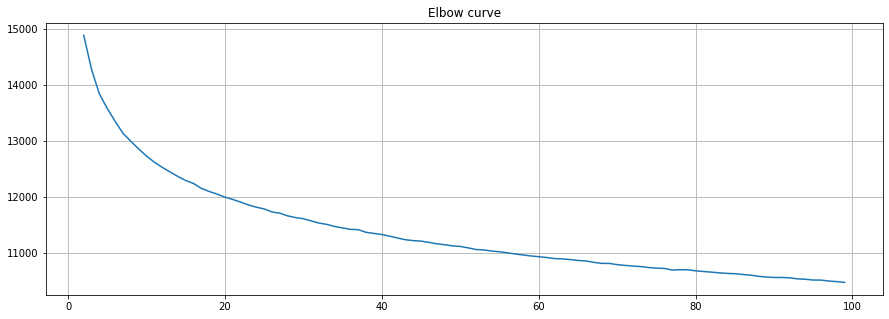

In [54]:
distorsions = []
for k in range(2, 100):
    clustering_model = KMeans(n_clusters=k)
    clustering_model.fit(corpus_embeddings)
    distorsions.append(clustering_model.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 100), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])